### Problem statement:

#### Task-02

To Perform data cleaning and exploratory data analysis (EDA) on a Titanic dataset from Kaggle and to explore the relationships between variables and identify patterns and trends in the data.

### Importing the libraries: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset:


In [2]:
data= pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Domain analysis: 

- The target variable is 'Survived'. It's a discrete column with 0-No, 1-Yes description of survival 
of passengers.
- The input variables include 11 columns such as PassengerId, Pclass, Name, Sex, Age, SibSp, Parch,
Ticket, Fare, Cabin, Embarked.
- The data tells us about the number of passengers who survived and not survived among the list of passengers who travelled in the Titanic.
- The passengerId depicts the unique Ids allocated to each of the passengers.
- Pclass represents the ticket class of 1st, 2nd and 3rd.
- SibSp denotes the no of siblings /spouses aboard the Titanic.
- Parch variable depicts the parents / children aboard the titanic.
- Cabin gives the cabin number of each of the passengers.
- Embarked denotes the port of embarkation such as C = Cherbourg, Q = Queenstown, S = Southampton.

### Basic checks:

In [3]:
data.shape # 891 rows and 12 columns

(891, 12)

In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Insights:
# Age, cabin, Embarked are the input variables with null values.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### Insights:
- The minimum value of the variable 'PassengerId' is 1 and the maximum value is 891 and it is a unique feature.
- The mean of Age column is 30, hence the average age of a passenger who travelled would be around 
30 years. The minimum age is less than 1 year and the maximum age is 80 years.
- The maximum number of siblings/ spouses travelled were 8 and the maximum number of parents/ children
who travelled aboard were 6.
- The average fare is around 32, the minimum fare is 0 and  the maximum fare is 512.
- The variable 'Name' is a unique feature.
- The category 'male' dominates the 'Sex' variable .
- 'S'(Southampton) constitutes the majority category in the 'Embarked' column.


### Exploratory Data Analysis: 

### Univariate analysis: 

In [9]:
# numerical features-  Age, Fare 
# categorical features- Sex, Embarked.
# discrete features- Survived,  Pclass,  SibSp,  Parch 
# Ticket, Cabin, Name are the features which does not show any meaningful relationship with the target variable.
# PassengerId is a unique feature.

In [10]:
import sweetviz as sz
report = sz.analyze(data)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
data_num = data[['Age', 'Fare']] # numerical features
data_cat = data[['Sex', 'Embarked']] # categorical features
data_dis = data[['Survived',  'Pclass',  'SibSp',  'Parch']] # discrete features

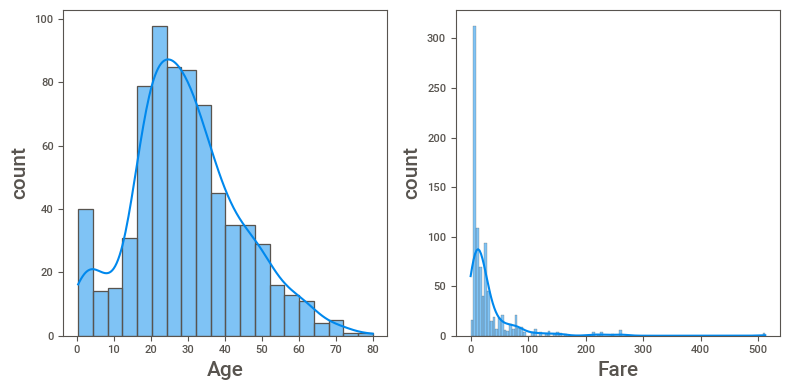

In [12]:
# numerical features

plt.figure(figsize= (8, 4))
plotnumber = 1

for column in data_num:
        if plotnumber <=2:
            ax = plt.subplot(1, 2, plotnumber)
            sns.histplot(data= data, x= column, kde = True)
            plt.xlabel(column, fontsize=15)
            plt.ylabel('count', fontsize= 15)
        plotnumber +=1
plt.tight_layout()       
      

#### Insights:
- Age column shows normal distribution ranging from around 0 to 80. More than 50% of population are in the range of 20-40 years of age.
- Fare column shows highly skewed distribution ranging from 0 to 512. Most of the passengers travelled in the range of 0-50.

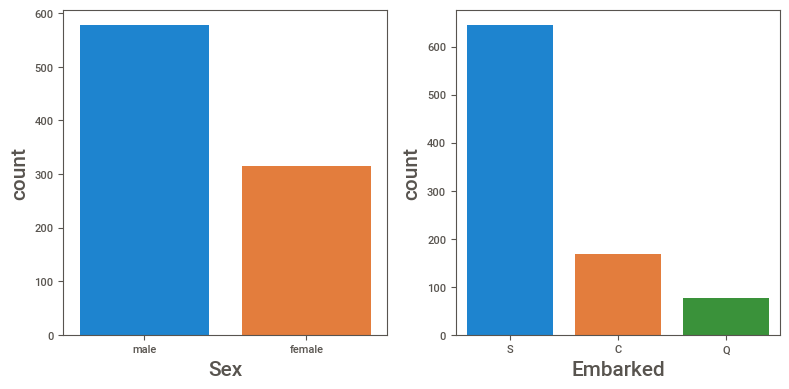

In [13]:
# categorical features

plt.figure(figsize= (8, 4))
plotnumber = 1

for column in data_cat:
        if plotnumber <=2:
            ax = plt.subplot(1, 2, plotnumber)
            sns.countplot(data= data, x= column)
            plt.xlabel(column, fontsize=15)
            plt.ylabel('count', fontsize= 15)
        plotnumber +=1
plt.tight_layout()  

In [14]:
data.Sex.value_counts(normalize= True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [15]:
data.Embarked.value_counts(normalize = True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

#### Insights:
- In Sex variable, male constitutes 65% of population whereas female population constitutes 35% of population who travelled aboard the titanic.
Hence male population is more than the female population.
- In embarked feature, 72% of people embarked their journey from the port of Southampton, 19% from the port of Cherbourg and 9% from the port of Queenstown.
Therefore, most of the population started their journey from the port of Queenstown. 

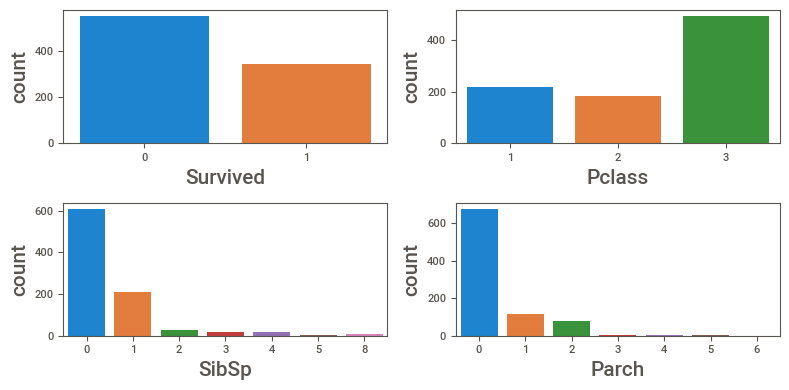

In [16]:
# discrete features.

plt.figure(figsize= (8, 4))
plotnumber = 1

for column in data_dis:
        if plotnumber <=4:
            ax = plt.subplot(2, 2, plotnumber)
            sns.countplot(data= data, x= column)
            plt.xlabel(column, fontsize=15)
            plt.ylabel('count', fontsize= 15)
        plotnumber +=1
plt.tight_layout()  

In [17]:
data['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [18]:
data['Pclass'].value_counts(normalize = True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [19]:
data['SibSp'].value_counts(normalize = True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [20]:
data['Parch'].value_counts(normalize = True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

#### Insights:
- Only 38% survived and the remaining 62% not survived in the catastrophe. Therefore, non survival rate is high in the accident.
- Around 55% travelled in the 3rd class ticket and it is followed by 1st class tickets.
- Around 68% of people travelled as singles without any siblings or spouses.
- Around 76% of passengers are neither parents nor children aboard the Titanic. 

### Bivariate analysis: 

#### Relationship between continuous variables and the target variable. 

<Axes: xlabel='Survived', ylabel='Fare'>

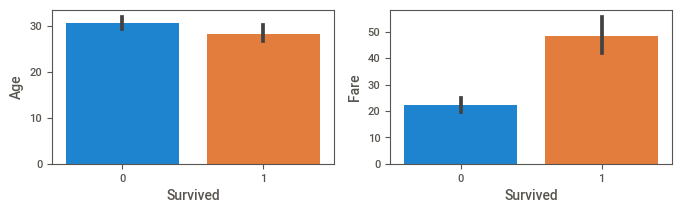

In [21]:
# Age
plt.figure(figsize=(8,2))
plt.subplot(121)
sns.barplot(data= data, x='Survived', y= 'Age')

# Fare
plt.subplot(122)
sns.barplot(data=data, x='Survived', y= 'Fare')

#### Insights:
- Passengers around 0 to 30 years are almost equal in survival and non survival status aboard the Titanic.
- Among the passengers who paid fare in the range of 0-50 , have more than half percent of survival rate.

#### Relationship between categorical variables and target variable. 

<Axes: xlabel='Embarked', ylabel='count'>

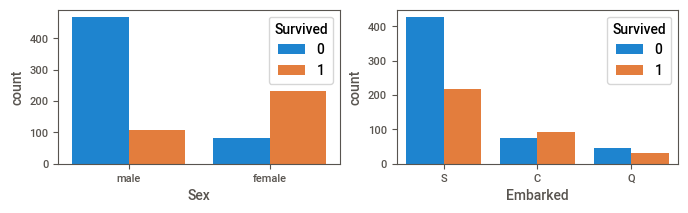

In [22]:
# Sex
plt.figure(figsize=(8,2))
plt.subplot(121)
sns.countplot(data= data, x='Sex', hue= 'Survived')

# Embarked
plt.subplot(122)
sns.countplot(data=data, x='Embarked', hue= 'Survived')

In [23]:
# Sex, female-0, male-1
pd.crosstab(index=data['Sex'], columns= data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [24]:
# Embarked, S-2, C-1, Q-0
pd.crosstab(index= data['Embarked'], columns= data['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [25]:
Q = (30/(47+30))*100
C= (93/(93+75))*100
S =(219/(219+ 427))*100
print(f'Queenstown: {Q}, Cherbourgh: {C}, Southampton: {S}')


Queenstown: 38.961038961038966, Cherbourgh: 55.35714285714286, Southampton: 33.90092879256966


#### Insights: 

- In Sex variable, it is clear that 233 female survived out of 344. And out of 577 male, 109 survived. The survival ratio of female is much greater than that of male. 
- In Embarked variable, the survival rate is higher for the port of Cherbourgh and it is followed by Queenstown. The passengers who embarked from the port of Southampton have very poor survival rate.

#### Relationship between discrete variables and the target variable 

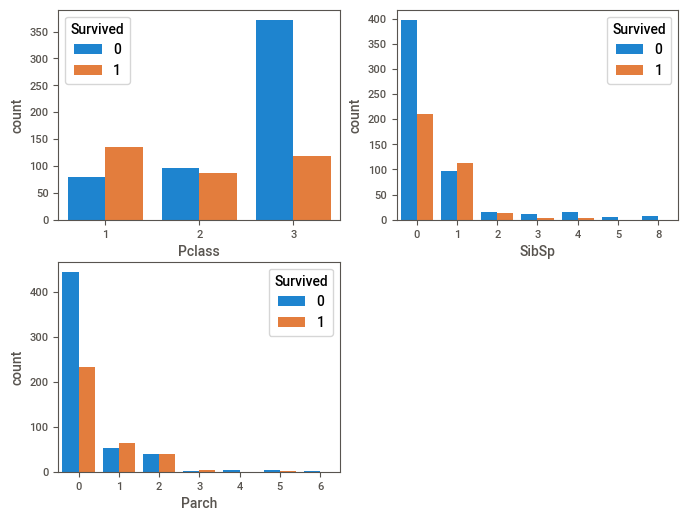

In [26]:
# Pclass
plt.figure(figsize=(8,6))
plt.subplot(221)
sns.countplot(data= data, x='Pclass', hue= 'Survived')

# SibSp
plt.subplot(222)
sns.countplot(data=data, x='SibSp', hue= 'Survived')

# Parch
plt.subplot(223)
sns.countplot(data=data, x='Parch', hue= 'Survived')
plt.show()


#### Insights: 

#### Pclass 
- Passengers of class 1 are given high priority while Rescue. 
- In class 2, survival and non-survival rate is 49% and 51% approx.
- In class 3, almost 25% survived.
- Eventhough there are more number of passengers in class 3 than class1 and class 2, only 25% got survived in class3. 
- While in Class 1, almost 68% people survived. 

#### SibSp
- Siblings or spouses >3 are very unlikely to survive.
- Siblings/ spouses of 1 and 2 have more survival rate than the passengers in other categories.

#### Parch
- Parents/ children of 1 and 2 have more survival rate than the other categories.



In [27]:
# Sex, Pclass, survived
# 0-female, 1- male

pd.crosstab(index= [data['Sex'],  data['Survived']], columns= data['Pclass'])

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

#### Insights:
- Women are given more priority while rescuing irrespective of the first class.
- Here, around 95-96% of women survived in first class but the survival rate of men in the same first 
class is very low.


<Axes: xlabel='Pclass', ylabel='Age'>

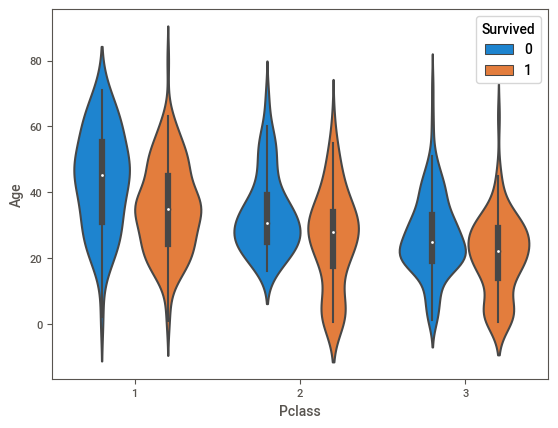

In [28]:
# Pclass, Age, Survived

sns.violinplot(data= data, x='Pclass', y= 'Age', hue='Survived')

#### Insights:
- The number of children is increasing from class 1 to class3. There are more children in class 3 than the other two. 
- Survival rate of children, for age 10 and below is good irrespective of Class.


### Data Cleaning/ Preprocessing: 

### Checking null values: 

In [29]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
# Age, Cabin, Embarked have null values

In [31]:
#Age - numerical column, normal distribution hence mean is used to impute the null value.

data.loc[data['Age'].isnull()==True, 'Age'] = np.mean(data['Age'].dropna(axis=0))

In [32]:
data.Age.isnull().sum()

0

In [33]:
# cabin- categorical column- mode function is used

data.Cabin.isnull().sum()

687

In [34]:
data.Cabin.mode() 

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [35]:
data.loc[data['Cabin'].isnull()==True, 'Cabin'] = 'B96'

In [36]:
data.Cabin.isnull().sum()

0

In [37]:
# Embarked

data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
data.loc[data['Embarked'].isnull()== True, 'Embarked'] = 'S'

In [39]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [40]:
# hence all null values are imputed

###  Checking outliers:

In [41]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

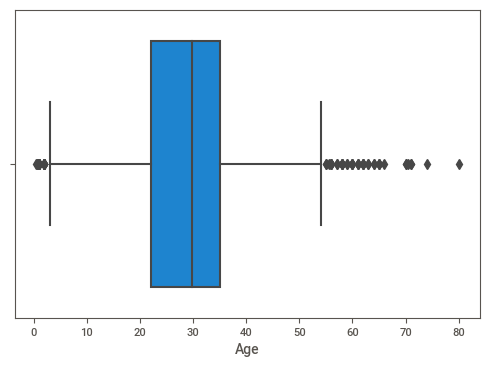

In [42]:
# continuous variables- Age, Fare

#Age
plt.figure(figsize=(6,4))
sns.boxplot(data= data, x='Age')
plt.show()

In [43]:
# Handling outliers
# Age
# normal distribution hence 3 sigma rule

mean = data.Age.mean()
std = data.Age.std()
lower_limit = mean- 3*std
upper_limit= mean + 3*std
print('lower_limit is', lower_limit)
print('upper_limit is', upper_limit)

lower_limit is -9.306928030949834
upper_limit is 68.70516332506747


In [44]:
data.loc[data['Age'] < lower_limit] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [45]:
data.loc[data['Age'] > upper_limit] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,B96,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,B96,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,B96,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,B96,S


In [46]:
data.loc[data['Age'] > upper_limit, 'Age'] = np.mean(data['Age'])

<Axes: xlabel='Age'>

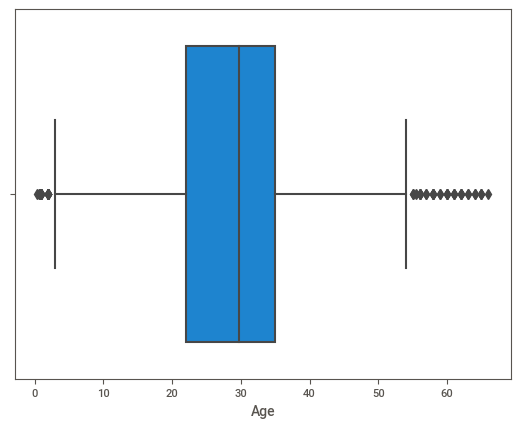

In [47]:
sns.boxplot(data=data, x='Age')

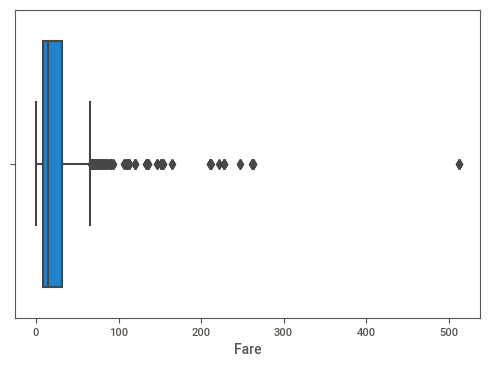

In [48]:
# Fare

plt.figure(figsize=(6,4))
sns.boxplot(data= data, x= 'Fare')
plt.show()

In [49]:
# Fare

# skewed distribution hence iqr method is used
q1 = data['Fare'].quantile(0.25)
q3 = data['Fare'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print('lower_limit is', lower_limit)
print('upper_limit is', upper_limit)

lower_limit is -26.724
upper_limit is 65.6344


In [50]:
data.loc[data['Fare'] <lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [51]:
data.loc[data['Fare'] > upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,B96,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,B96,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,B96,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,B96,S


In [52]:
data.loc[data['Fare'] > upper_limit, 'Fare'] = np.median(data['Fare'])

<Axes: xlabel='Fare'>

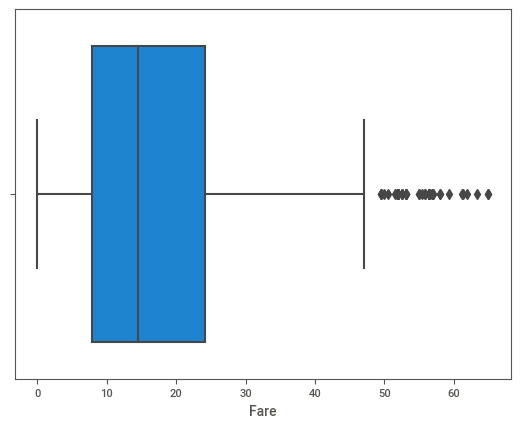

In [53]:
sns.boxplot(data=data, x = 'Fare') # outliers are significantly reduced comparatively.

### Encoding: 

In [54]:
# categorical features- Sex, Embarked
# Sex variable is nominal data hence one-hot encoding is done.
# mapping is done on the Embarked variable.

In [55]:
# Sex

data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [56]:
# one-hot encoding 

data['Sex'] = pd.get_dummies(data['Sex'], drop_first = True)

In [57]:
data.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [58]:
# Embarked

data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [59]:
data['Embarked'] = data['Embarked'].map({'Q':0, 'C':1, 'S':2})

In [60]:
data.Embarked.value_counts()

2    646
1    168
0     77
Name: Embarked, dtype: int64

In [61]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              uint8
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [62]:
# Name, Ticket, cabin are the unique features hence they would be dropped.

In [63]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,14.4542,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96,2


### Checking duplicate records:


In [64]:
data.duplicated().sum()

0

### Scaling: 

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
data[['Age','Fare']] = scaling.fit_transform(data[['Age','Fare']])

In [66]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.329064,1,0,A/5 21171,0.111538,B96,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.573041,1,0,PC 17599,0.222372,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,0.390058,0,0,STON/O2. 3101282,0.121923,B96,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.527295,1,0,113803,0.816923,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,0.527295,0,0,373450,0.123846,B96,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0.405306,0,0,211536,0.200000,B96,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,0.283318,0,0,112053,0.461538,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.446464,1,2,W./C. 6607,0.360769,B96,2
889,890,1,1,"Behr, Mr. Karl Howell",1,0.390058,0,0,111369,0.461538,C148,1


#### Dropping irrelevant columns:


In [67]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              uint8
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [68]:
# PassengerId, Name, Ticket, Cabin are the unique features

data.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace = True)
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.329064,1,0,0.111538,2
1,1,1,0,0.573041,1,0,0.222372,1
2,1,3,0,0.390058,0,0,0.121923,2


<Axes: >

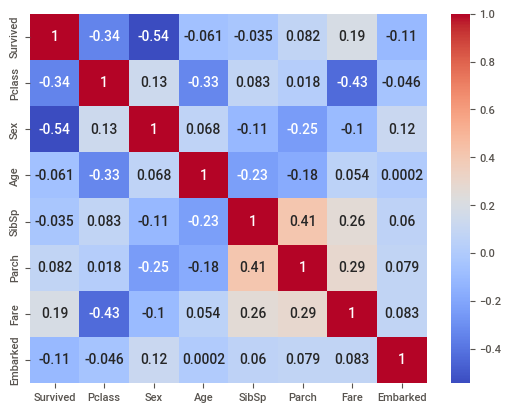

In [69]:
# Checking correlation

sns.heatmap(data.corr(), annot =True, cmap= 'coolwarm')

### Balancing the dataset: 

In [70]:
data['Survived'].value_counts() # imbalanced

0    549
1    342
Name: Survived, dtype: int64

In [71]:
# splitting the data
X= data.drop('Survived', axis = 1)
y = data['Survived']

In [72]:
# traintestsplit

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
y_train.value_counts()

0    444
1    268
Name: Survived, dtype: int64

In [74]:
# balancing the dataset using SMOTE function

from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_sm, y_train_sm =smote.fit_resample(x_train, y_train)

In [75]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_train_sm))

Counter({0: 444, 1: 268})
Counter({0: 444, 1: 444})
